In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing and reading the csv file
df = pd.read_csv("Fraud.csv")

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Let us start with data cleaning part**

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
num_col = df.select_dtypes(include=['number']).columns
cat_col = df.select_dtypes(include=['object']).columns
print(num_col)
print(cat_col)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [11]:
#dropping unuseful columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

removing outliers

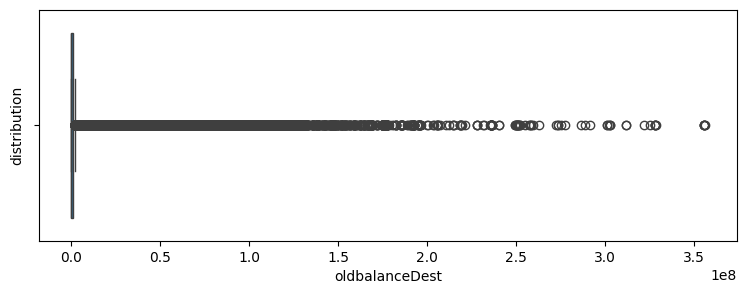

In [12]:
# oldbalanceDest
plt.figure(figsize=[9,3])
sns.boxplot(x='oldbalanceDest', data=df)
plt.ylabel('distribution')
plt.show()

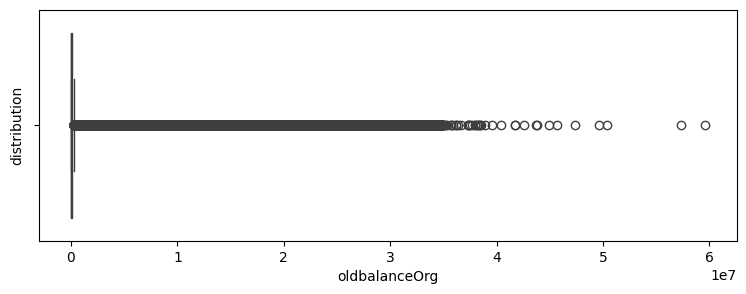

In [13]:
# oldbalanceOrg
plt.figure(figsize=[9,3])
sns.boxplot(x='oldbalanceOrg', data=df)
plt.ylabel('distribution')
plt.show()

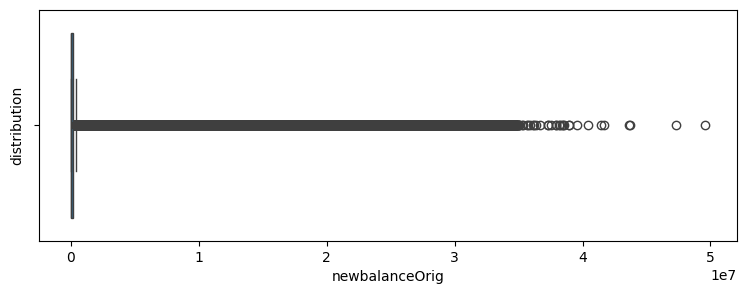

In [14]:
# newbalanceOrig
plt.figure(figsize=[9,3])
sns.boxplot(x='newbalanceOrig', data=df)
plt.ylabel('distribution')
plt.show()

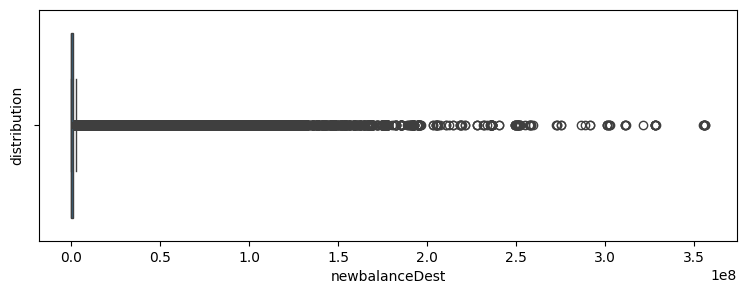

In [15]:
# newbalanceDest
plt.figure(figsize=[9,3])
sns.boxplot(x='newbalanceDest', data=df)
plt.ylabel('distribution')
plt.show()

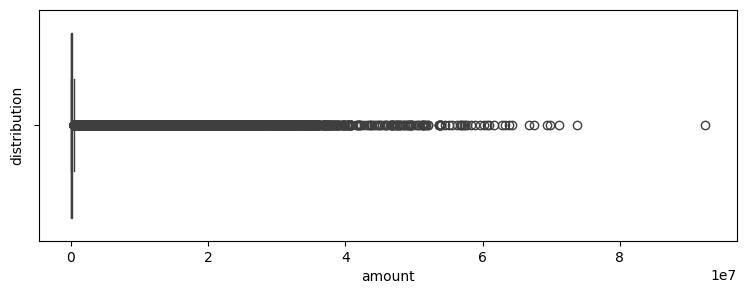

In [16]:
# Amount
plt.figure(figsize=[9,3])
sns.boxplot(x='amount', data=df)
plt.ylabel('distribution')
plt.show()

In [17]:
# creating function to remove outliers
def remove_outliers(df,col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    temp = df.loc[(df[col]>lower_whisker)&(df[col]<upper_whisker)]
    return temp[col]

In [18]:
# calling the function to remove outliers
df['oldbalanceDest'] = remove_outliers(df, 'oldbalanceDest')
df['oldbalanceOrg'] = remove_outliers(df, 'oldbalanceOrg')
df['newbalanceDest'] = remove_outliers(df, 'newbalanceDest')
df['newbalanceOrig'] = remove_outliers(df, 'newbalanceOrig')
df['amount'] = remove_outliers(df, 'amount')

**Exploratory Data Analysis**

Check multicollinearity

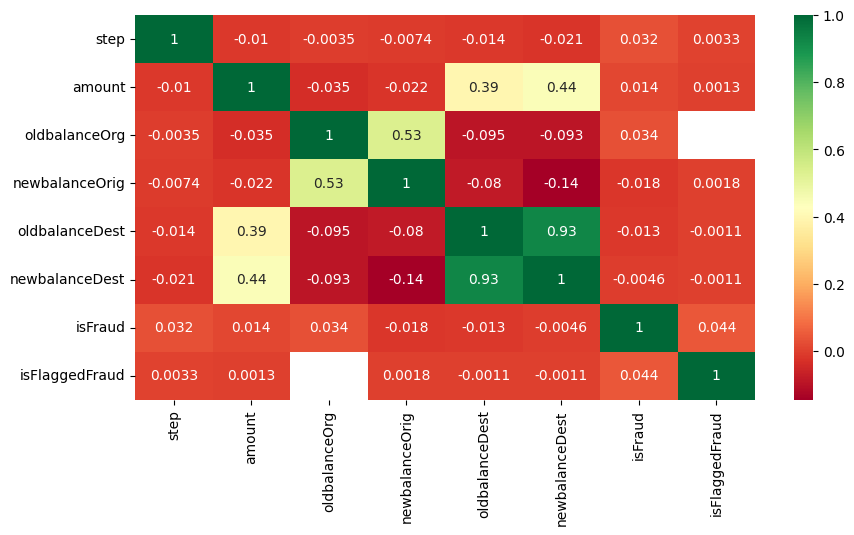

In [19]:
#Correlation of numeric data
plt.figure(figsize=[10,5])
sns.heatmap(df[num_col].corr(), annot=True, cmap='RdYlGn')
plt.show()

isFraud
0    6354407
1       8213
Name: count, dtype: int64


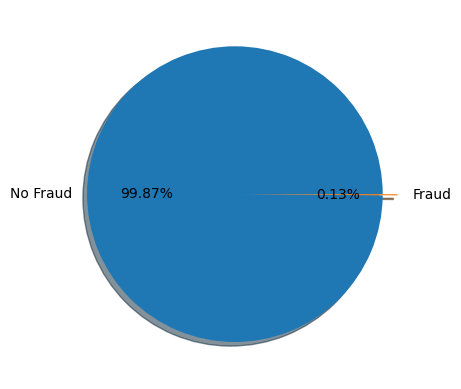

In [20]:
# value count
print(df.isFraud.value_counts())

# pie plot for the value count
plt.pie(df.isFraud.value_counts(),explode=[0.1, 0], 
        labels=['No Fraud', 'Fraud'], shadow=True, autopct='%1.2f%%')
plt.show()

*The provided plot indicates a significant imbalance in the dataset, primarily stemming from the small proportion of fraudulent cases compared to non-fraudulent cases.*

Type of payment

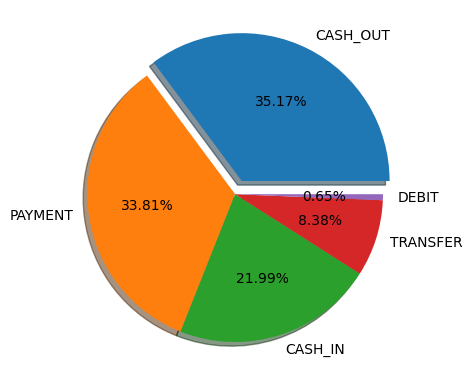

In [21]:
# pie plot for the value count of each category

values = df['type'].value_counts().values
labels = df['type'].value_counts().keys()
explode = (0.1,0,0,0,0)

plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.2f%%')
plt.show()

*The dataset exhibits a notable imbalance, with "CASH_OUT" and "Payment" transactions collectively representing more than two-thirds of the total. In contrast, "CASH_IN" transactions constitute just over one-fifth, while "Debit" and "Transfer" transactions contribute to less than one-tenth of the overall share.*

Value count

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


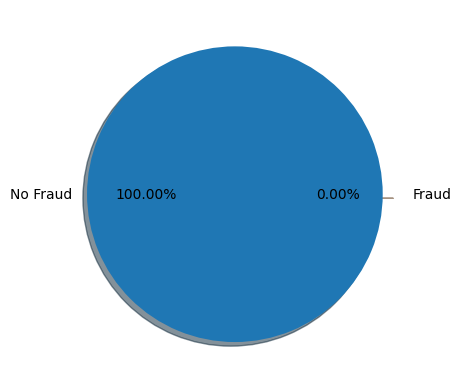

In [22]:

#isFlaggedFraud
print(df.isFlaggedFraud.value_counts())

# pie plot for the value count
plt.pie(df.isFlaggedFraud.value_counts(),explode=[0.1, 0], 
        labels=['No Fraud', 'Fraud'], shadow=True, autopct='%1.2f%%')
plt.show()

Amount

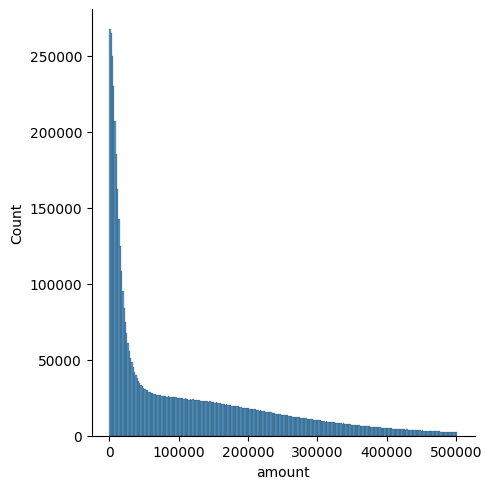

In [23]:
# distplot
sns.displot(data=df, x='amount')
plt.show()

C:\Users\Ankit Kumar\AppData\Local\Temp\ipykernel_18404\3927140158.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_fraud_case['amount'])


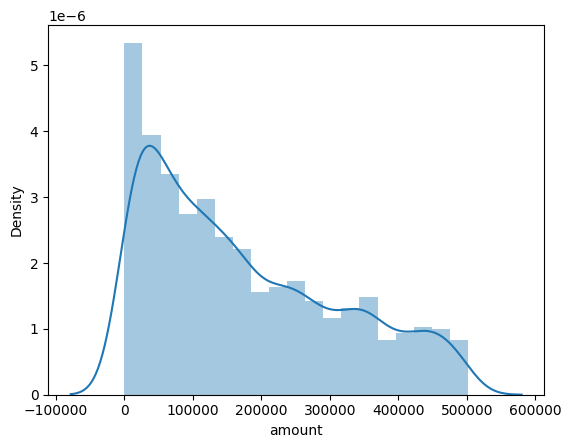

In [24]:
# distplot of amount of fraud cases 
positive_fraud_case = df[df.isFraud == 1]
sns.distplot(positive_fraud_case['amount'])
plt.show()

Amount and payment types

In [25]:
#Max amount for each type

max_amount_type = df.groupby('type')['amount'].max().sort_values(ascending=False).reset_index()[:10]
max_amount_type

,type,amount
0,CASH_OUT,501718.41
1,CASH_IN,501718.02
2,TRANSFER,501709.63
3,DEBIT,417825.07
4,PAYMENT,238637.98


C:\Users\Ankit Kumar\AppData\Local\Temp\ipykernel_18404\2613557397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='amount', data=max_amount_type, palette='magma')


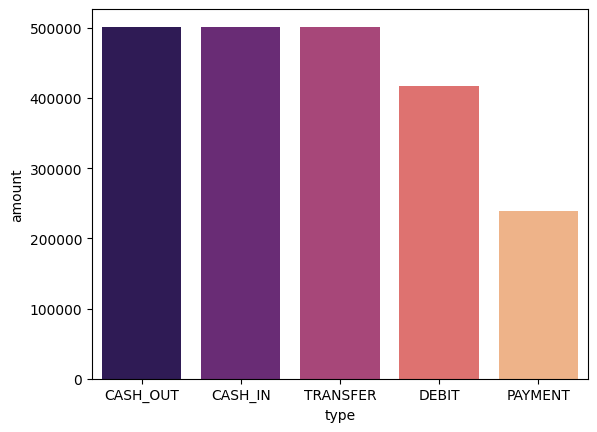

In [26]:
# barplot for max amount of each type of payment
sns.barplot(x='type', y='amount', data=max_amount_type, palette='magma')
plt.show()

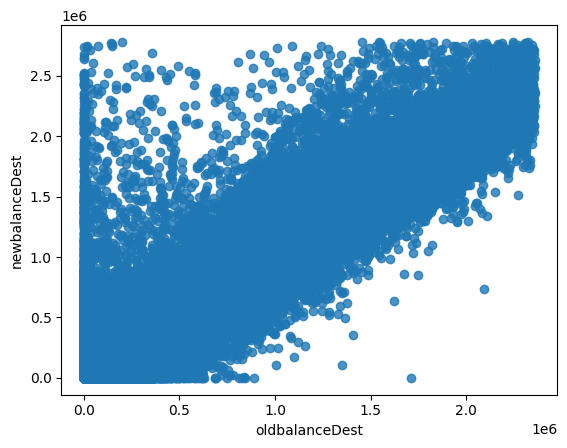

In [27]:
# regplot of relation b/w the old and new balance of the Recipient
sns.regplot(x='oldbalanceDest',y='newbalanceDest',data=df.sample(100000))
plt.show()

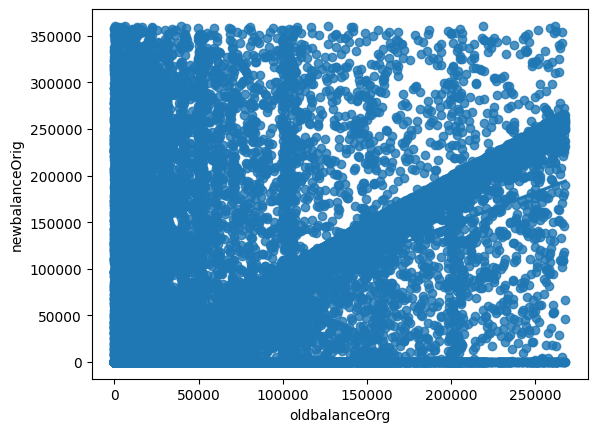

In [28]:
# regplot of relation b/w the old and new balance of the Sender
sns.regplot(x='oldbalanceOrg',y='newbalanceOrig',data=df.sample(100000))
plt.show()

**Data Pre-processing**

In [29]:
#Creating dummy variables
payment_types = pd.get_dummies(df.type, prefix='type', drop_first=True)
df = pd.concat([df,payment_types], axis=1)
# dropping the type column
df.drop('type', axis=1, inplace=True)

In [30]:
df['type_CASH_OUT'] = df['type_CASH_OUT'].astype(np.int64)
df['type_DEBIT'] = df['type_DEBIT'].astype(np.int64)
df['type_PAYMENT'] = df['type_PAYMENT'].astype(np.int64)
df['type_TRANSFER'] = df['type_TRANSFER'].astype(np.int64)

**Splitting of data**

In [31]:
# min-max normalization t
df['amount'].fillna(df['amount'].mean(),inplace=True)
df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].mean(),inplace=True)
df['newbalanceOrig'].fillna(df['newbalanceOrig'].mean(),inplace=True)
df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(),inplace=True)
df['newbalanceDest'].fillna(df['newbalanceDest'].mean(),inplace=True)

In [32]:
# split data into X and y
X = df.drop('isFraud', axis=1)
y = df.isFraud

**Model Training and Evaluation**

In [33]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [34]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2000)
print('dimensions of training data: ',X_train.shape,'\n',
     'dimensions of testing data: ',X_test.shape)

dimensions of training data:  (4453834, 11) 
 dimensions of testing data:  (1908786, 11)


In [35]:
# apply pca to train data
pca = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA())])

In [36]:
pca.fit(X_train)
train_pca = pca.fit_transform(X_train)

In [37]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explained variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      49.02
1      67.95
2      75.98
3      82.93
4      87.62
5      92.22
6      96.21
7      98.27
8      99.23
9     100.00
10    100.00
dtype: float64


PCA and Logistic Regression

In [38]:
# create pipeline
PCA_VARS = 6
steps = [('scaler', MinMaxScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [39]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.810287945172631

Evaluate on test data

In [40]:

# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity and specificity
true_positive = conf_matrix[1, 1]
false_negative = conf_matrix[1, 0]
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[1544958  361404]
 [    238    2186]]
Sensitivity: 	0.9
Specificity: 	0.81
AUC:    	 0.94


In [41]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", MinMaxScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
#params = {'pca__n_components': [6, 8], 'logistic__C': [0.01,0.001,1,10,100, 10000], 'logistic__penalty': ['l1', 'l2']}
'''from hyperparameter tuning best parameter was observed further 6 , 10000 , l2 respectively but running this piece of 
code takes time so commenting it out and providing the best parameters'''
params = {'pca__n_components': [6], 'logistic__C': [10000], 'logistic__penalty': ['l2']}


# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
# print best hyperparameters
#print("Best AUC: ", model.best_score_)
#print("Best hyperparameters: ", model.best_params_)

In [ ]:
# predict fraud on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

true_positive = conf_matrix[1, 1]
false_negative = conf_matrix[1, 0]
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))